In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\TSA\Forecasting Principles and Practice 3rd\2\global_economy.csv"

df = pd.read_csv(path)
df.head()

,Country,Code,Year,GDP,Growth,CPI,Imports,Exports,Population
0,Afghanistan,AFG,1960,5.377778e+08,NaN,NaN,7.024793,4.132233,8996351.0
1,Afghanistan,AFG,1961,5.488889e+08,NaN,NaN,8.097166,4.453443,9166764.0
2,Afghanistan,AFG,1962,5.466667e+08,NaN,NaN,9.349593,4.878051,9345868.0
3,Afghanistan,AFG,1963,7.511112e+08,NaN,NaN,16.863910,9.171601,9533954.0
4,Afghanistan,AFG,1964,8.000000e+08,NaN,NaN,18.055555,8.888893,9731361.0


In [7]:
aus = df[df['Country']=='Australia'].reset_index(drop=True)
aus.head(1)

,Country,Code,Year,GDP,Growth,CPI,Imports,Exports,Population
0,Australia,AUS,1960,1.857319e+10,NaN,7.960458,14.061746,12.994452,10276477.0


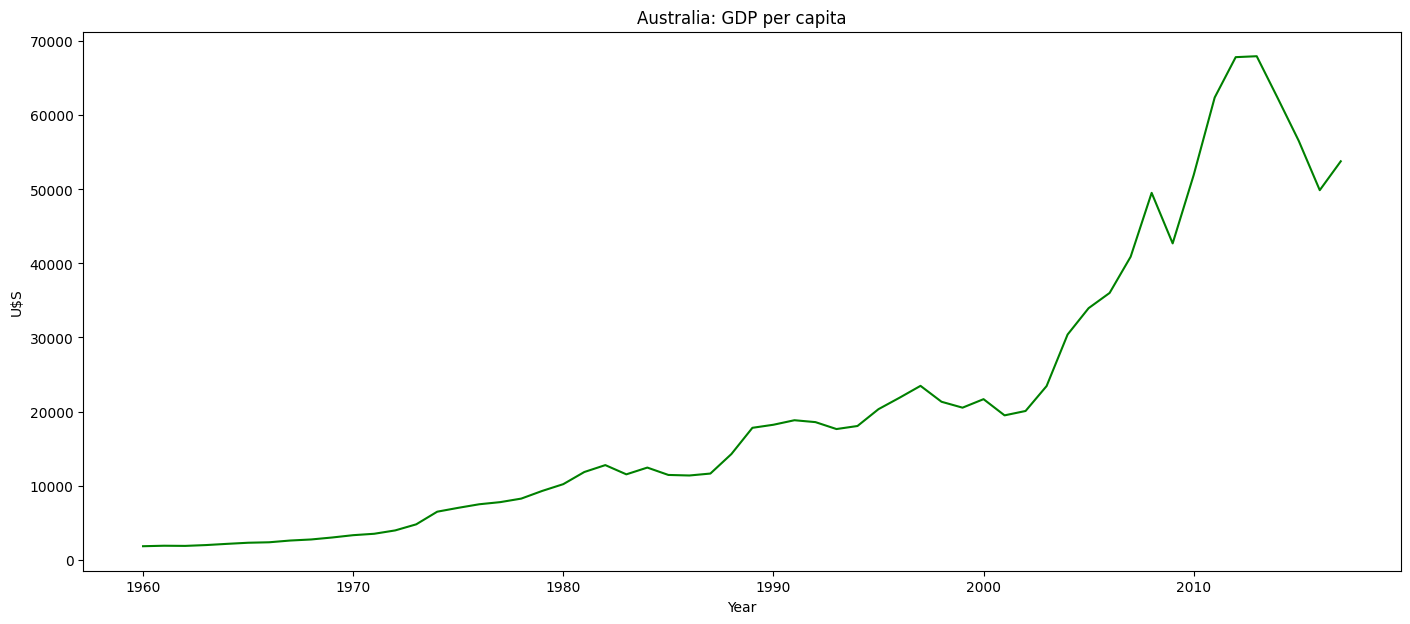

In [8]:
fig, ax = plt.subplots(figsize=(17, 7))
ax.plot(aus['Year'], aus['GDP'] / aus['Population'], c='green')
ax.set_xlabel('Year')
ax.set_ylabel('U$S')
ax.set_title('Australia: GDP per capita')
plt.show()

In [9]:
path2 = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\TSA\Forecasting Principles and Practice 3rd\2\aus_retail.csv"
df2 = pd.read_csv(path2)

df2.head()

,State,Industry,Series ID,Month,Turnover
0,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982 abr.,4.4
1,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982 may.,3.4
2,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982 jun.,3.6
3,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982 jul.,4.0
4,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982 ago.,3.6


In [12]:
aus_production = pd.read_csv(r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\TSA\Forecasting Principles and Practice 3rd\2\aus_production.csv")

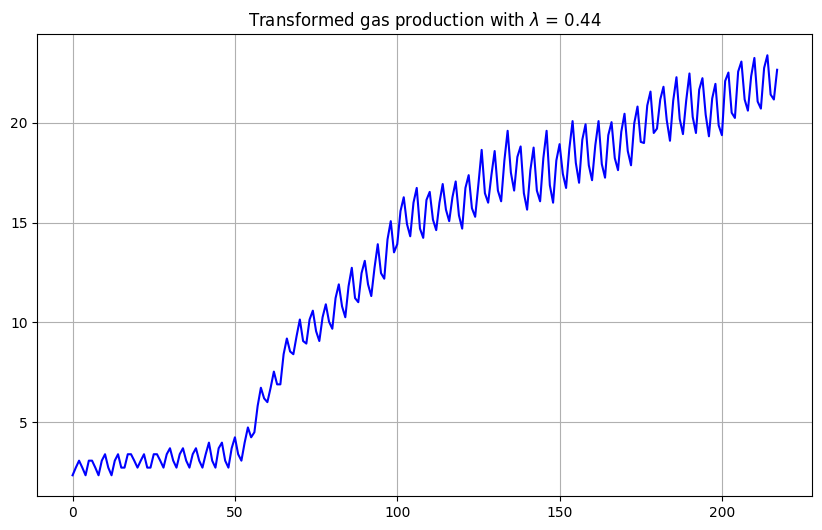

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Supongamos que 'aus_production' es un DataFrame de pandas que contiene la columna 'Gas'

# Función de guerrero (puedes definir tu propia implementación si es necesario)
def guerrero(series):
    # Usamos stats.boxcox para calcular lambda óptimo
    _, lambda_opt = stats.boxcox(series)
    return lambda_opt

# Aplicamos la función guerrero para obtener el lambda de Box-Cox
lambda_guerrero = guerrero(aus_production['Gas'])

# Aplicamos la transformación Box-Cox a la columna 'Gas'
gas_transformed = stats.boxcox(aus_production['Gas'], lmbda=lambda_guerrero)

# Generamos el gráfico con Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(aus_production.index, gas_transformed, label='Gas Transformed', color='blue')

# Configuramos los labels y el título con soporte nativo para LaTeX
plt.title(f"Transformed gas production with $\\lambda$ = {round(lambda_guerrero, 2)}")
plt.ylabel('')
plt.xlabel('')

# Mostramos el gráfico
plt.grid(True)
plt.show()


In [ ]:
def guerrero(series):
    # Usamos stats.boxcox para calcular lambda óptimo
    _, lambda_opt = stats.boxcox(series)
    return lambda_opt

# Aplicamos la función guerrero para obtener el lambda de Box-Cox
lambda_guerrero = guerrero(aus_production['Gas'])

0.437431564631937

In [19]:
from scipy import stats, optimize

# Función para calcular el lambda óptimo mediante maximización de la log-verosimilitud
def guerrero(series):
    # Función para minimizar (log-verosimilitud negativa de Box-Cox)
    def neg_log_likelihood(lmbda):
        return -stats.boxcox_llf(lmbda, series)
    
    # Utilizamos el optimizador para encontrar el valor óptimo de lambda
    result = optimize.minimize_scalar(neg_log_likelihood, bounds=(-5, 5), method='bounded')
    
    # Devolvemos el valor óptimo de lambda
    return result.x

# Aplicamos la función guerrero para obtener el lambda de Box-Cox
lambda_guerrero = guerrero(aus_production['Gas'])
lambda_guerrero


0.4374311635180404

In [23]:
from scipy import stats

stats.boxcox(aus_production['Gas'], lmbda=None, alpha=None, optimizer=None)

(array([ 2.33605033,  2.71977776,  3.06896467,  2.71977776,  2.33605033,
         3.06896467,  3.06896467,  2.71977776,  2.33605033,  3.06896467,
         3.39107261,  2.71977776,  2.33605033,  3.06896467,  3.39107261,
         2.71977776,  2.71977776,  3.39107261,  3.39107261,  3.06896467,
         2.71977776,  3.06896467,  3.39107261,  2.71977776,  2.71977776,
         3.39107261,  3.39107261,  3.06896467,  2.71977776,  3.39107261,
         3.69123668,  3.06896467,  2.71977776,  3.39107261,  3.69123668,
         3.06896467,  2.71977776,  3.39107261,  3.69123668,  3.06896467,
         2.71977776,  3.39107261,  3.97316585,  3.06896467,  2.71977776,
         3.69123668,  3.97316585,  3.06896467,  2.71977776,  3.69123668,
         4.23964028,  3.39107261,  3.06896467,  3.97316585,  4.73436058,
         4.23964028,  4.4928062 ,  5.80834742,  6.72450548,  6.19013345,
         6.00206796,  6.72450548,  7.53417676,  6.89382589,  6.89382589,
         8.4046517 ,  9.1923317 ,  8.54107385,  8.4

In [18]:
from sklearn.preprocessing import PowerTransformer

def guerrero(series):
    # Usamos PowerTransformer con el método de Box-Cox
    pt = PowerTransformer(method='box-cox', standardize=False)
    pt.fit(series.values.reshape(-1, 1))
    return pt.lambdas_[0]

# Obtener el lambda óptimo para la transformación Box-Cox
lambda_guerrero = guerrero(aus_production['Gas'])
lambda_guerrero

0.437431564631937